___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Leonardo Bhering 

## Gustavo Molina

___

## INTRODUÇÃO

Este projeto tem como objetivo prever qual o valor de mercado de um jogador de futebol com base em algumas variaveis, como sua idade e seus números da temporada.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [435]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

In [436]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Downloads\cddp3-master


### BASE DE DADOS

In [437]:
dados = pd.read_excel('jogadores.xlsx')

In [438]:
dados.dtypes

Rank                                       int64
Jogador                                   object
Posição                                    int64
Idade                                      int64
Valor de Mercado (em milhões de euros)     int64
Jogos                                      int64
Gols                                       int64
Assistencias                               int64
dtype: object

In [439]:
print('Base de dados com a qual trabalharemos:')
dados.head()

Base de dados com a qual trabalharemos:


,Rank,Jogador,Posição,Idade,Valor de Mercado (em milhões de euros),Jogos,Gols,Assistencias
0,1,Neymar,1,26,180,32,29,19
1,2,Lionel Messi,2,30,180,55,45,18
2,3,Kylian Mbappé,2,19,120,50,23,19
3,4,Harry Kane,3,24,120,48,41,5
4,5,Cristiano Ronaldo,3,33,120,45,46,8


In [440]:
dados.columns = ['Rank','Jogador','posição','idade','valor','jogos','gols','assistencias']

In [441]:
dados_filtro = dados.iloc[0:,[2,3,4,5,6,7]]
dados_filtro.head()

,posição,idade,valor,jogos,gols,assistencias
0,1,26,180,32,29,19
1,2,30,180,55,45,18
2,2,19,120,50,23,19
3,3,24,120,48,41,5
4,3,33,120,45,46,8


### ANÁLISE DESCRITIVA

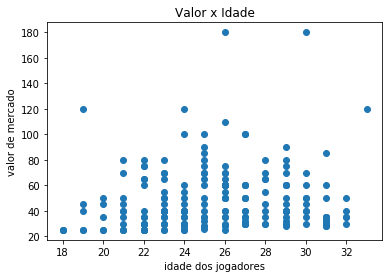

In [442]:
x = plt.scatter(dados_filtro['idade'], dados_filtro['valor'] )
plt.xlabel('idade dos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Idade')
plt.show(x)


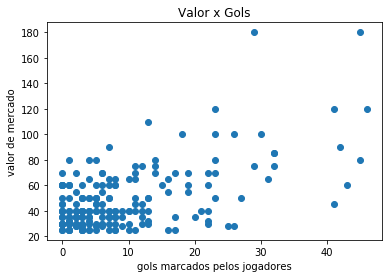

In [443]:
k = plt.scatter(dados_filtro['gols'], dados_filtro['valor'] )
plt.xlabel('gols marcados pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Gols')
plt.show(k)

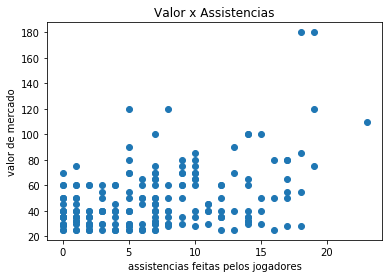

In [444]:
u = plt.scatter(dados_filtro['assistencias'] , y)
plt.xlabel('assistencias feitas pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Assistencias')
plt.show(u)

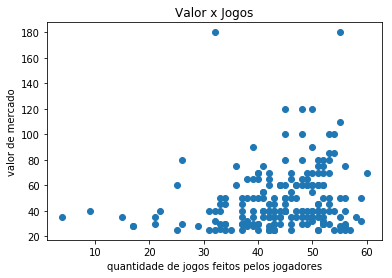

In [445]:
i = plt.scatter(dados_filtro['jogos'] , y)
plt.xlabel('quantidade de jogos feitos pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Jogos')
plt.show(i)

C:\Users\Gustavo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


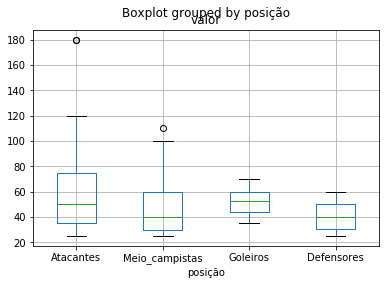

In [446]:
dados_filtro['posição'][(dados_filtro['posição'] ==1) | (dados_filtro['posição'] ==2) | (dados_filtro['posição']==3)] = [1]
dados_filtro['posição'][(dados_filtro['posição'] ==4) | (dados_filtro['posição'] ==5) | (dados_filtro['posição']==6) | (dados_filtro['posição']==7) | (dados_filtro['posição'] ==12) | (dados_filtro['posição'] ==13)] = [2]
dados_filtro['posição'][(dados_filtro['posição'] ==8)] = [3]
dados_filtro['posição'][(dados_filtro['posição'] ==9) | (dados_filtro['posição'] ==10) | (dados_filtro['posição']==11)] = [4] 

dados_filtro['posição']=dados_filtro['posição'].astype("category")
dados_filtro['posição'].cat.categories=("Atacantes","Meio_campistas","Goleiros","Defensores")

w = dados_filtro.boxplot(column='valor',by='posição')
plt.show(w)

In [447]:
#Dividindo a base de dados em 90% para treinamento e 10% para teste
treinamento, teste = train_test_split(dados_filtro, test_size=0.1)

In [448]:
teste.head()

,posição,idade,valor,jogos,gols,assistencias
140,Atacantes,28,35,15,7,1
97,Defensores,22,40,41,1,0
18,Meio_campistas,29,80,52,1,5
137,Defensores,30,35,50,6,0
13,Atacantes,31,85,53,32,18


In [449]:
treinamento.head()

,posição,idade,valor,jogos,gols,assistencias
159,Atacantes,24,30,40,7,8
174,Atacantes,29,28,29,5,10
150,Atacantes,23,30,56,13,14
3,Atacantes,24,120,48,41,5
173,Meio_campistas,24,28,39,6,5


___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

Modelo de Predição pela Média:

In [450]:
#Modelo de Predição pela média
#Achando a média dos valores de mercado de cada jogador
media=treinamento['valor'].mean()
print(media)

48.666666666666664


In [451]:
#Aplicando o R^2
valor = (teste['valor'] - media)**2
r2 = 1 - (valor.sum()/valor.sum())
r2

0.0

In [452]:
#Aplicando o RMS
rms = (valor.sum()/20)**0.5
rms

19.04628864401438

Modelo de Regressão Linear:

In [453]:
#Separar em variáveis independentes e a variável dependente
X = dados_filtro.iloc[0:,[0,1,3,4,5]].values #Variáveis independentes
y = dados_filtro.iloc[0:,2].values #Variável dependente (Valor do jogador)

In [454]:
#Codificação da variável posição (de string para float)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [455]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state = 0)

In [456]:
#Aplicando a Regressão Linear Multipla noa base trenamento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [457]:
#Prevendo os resultados dos dados teste
y_pred = regressor.predict(X_teste)
y_pred

array([ 32.65587543,  35.08483692,  36.84098629,  43.17638167,
        40.96293494,  55.08098753,  68.58821445,  54.38969712,
        77.829266  ,  46.49009046,  59.980539  ,  39.5181545 ,
        53.77925603,  39.83040632,  51.0680825 ,  80.61775404,
        64.32501166,  47.58372588,  47.80729869,  46.99688492])

In [458]:
#Transformado o array(predição dos valores) e a coluna(teste['valor']) em lista
lista_y = y_pred.tolist()
lista_v = teste['valor'].tolist()
media2 = 0
for i in range(len(lista_v)):
    media2 = media2 +lista_v[i]
media_f = media2/20
lista_R = []
for j in range(len(lista_y)):
    R12 = (lista_v[j] - lista_y[j])**2
    lista_R.append(R12)
teste['valor_estipulado'] = lista_R
div_f0 = teste['valor_estipulado'].sum()


In [459]:
#Calculando o RMS
RMS2 = (div_f0/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS2))

O valor de RMS na regressão linear é 25.63308324961919


In [460]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [461]:
regr = ols('valor ~ posição + idade + jogos + gols + assistencias',data = treinamento).fit()
regr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  valor   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     19.35
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           5.93e-19
Time:                        17:11:24   Log-Likelihood:                -782.33
No. Observations:                 180   AIC:                             1581.
Df Residuals:                     172   BIC:                             1606.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.8561     13.052      0.679      0.498     -16.907      34.619
posição[T.Meio_campistas]     6.8450      4.234      1.617      0.108      -1.512      15.202
posição[T.Goleiros]          36.1471      9.443      3.828      0.000      17.508      54.786
posição[T.Defensores]        15.3246      5.194      2.950      0.004       5.073      25.577
idade                         0.3794      0.436      0.869      0.386      -0.482       1.241
jogos                        -0.0194      0.169     -0.115      0.909      -0.354       0.315
gols                          1.5567      0.199      7.836      0.000       1.165       1.949
assistencias                  1.2680      0.362      3.504      0.001       0.554       1.982
==============================================================================
Omnibus:                       38.616   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.399
Skew:                           0.828   Prob(JB):                     1.95e-26
Kurtosis:                       6.611   Cond. No.                         484.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [462]:
pred = regr1.predict(X_teste)

lista_p = pred.tolist()
lista_V = []
for c in range(len(lista_p)):
    R123 = (lista_v[c] - lista_p[c])**2
    lista_V.append(R123)
teste['valor_est'] = lista_V
soma = teste['valor_est'].sum()

RMS3 = (soma/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS3))


O valor de RMS na regressão linear é 26.064082469966912


___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS